# **Gradient Descent**
- It is a one of the technique which finds linear equation for given table.
- It is code for Machine Learning and Deep Learning espacially for supervised learning.
- It is a one of the prediction function of supervised machine learning.

**For calculating new weights and bias values**

w1_new = w1 - learning rate*d/d(w1)

w2_new = w2 - learning rate*d/d(w2)

b_new = b - learning rate*d/d(b)

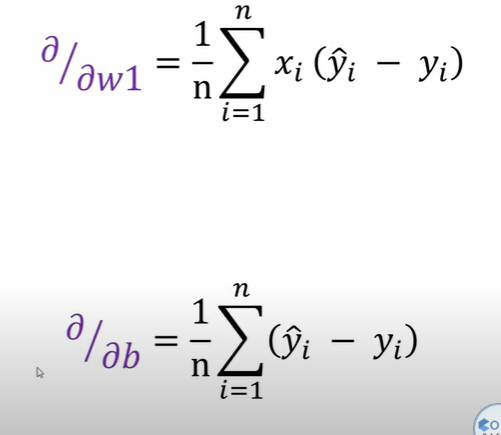



# **Implement Gradient Descent For Neural Network (or Logistic Regression)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [ ]:
X_train

,age,affordibility
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1
19,18,1
25,54,1
16,25,0
20,21,1
3,52,0


In [ ]:
len(X_train)

22

In [ ]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [ ]:
X_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


**Model Building:** First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

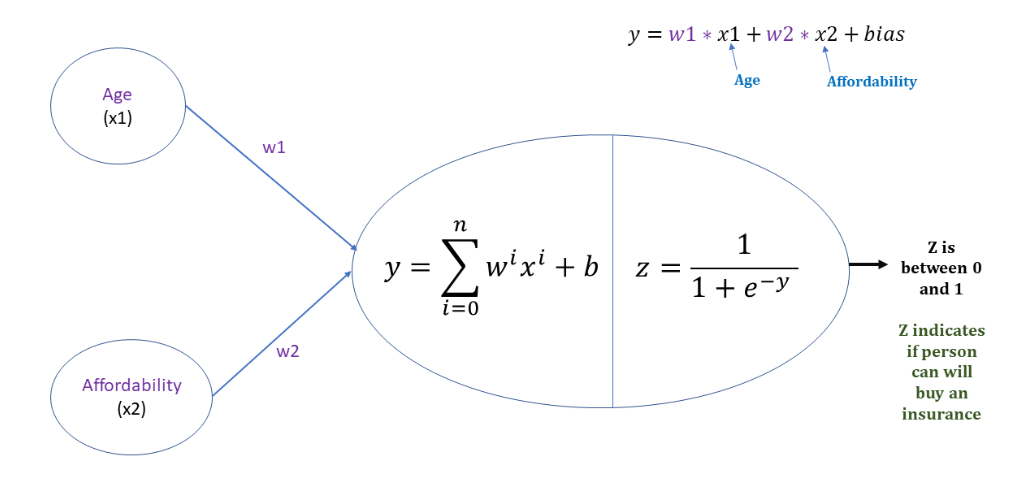

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7273 - loss: 0.5319
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.5319
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7273 - loss: 0.5318
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7273 - loss: 0.5318
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.

**Evaluate the model on test set**

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [ ]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [ ]:
y_test

,bought_insurance
2,1
10,0
21,0
11,0
14,1
9,1


In [ ]:
coef, intercept = model.get_weights()

In [ ]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

y=mx+c

y=x1*w1+x2*w2+b

# **Building a Neural Network from Scratch without using tensorflow**

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [ ]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

In [ ]:
prediction_function(.47, 1)

<ipython-input-16-df3a8331269d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.705484819775958

In [ ]:
prediction_function(.18, 1)

<ipython-input-16-df3a8331269d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.35569571637887243

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [ ]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

# **Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent**

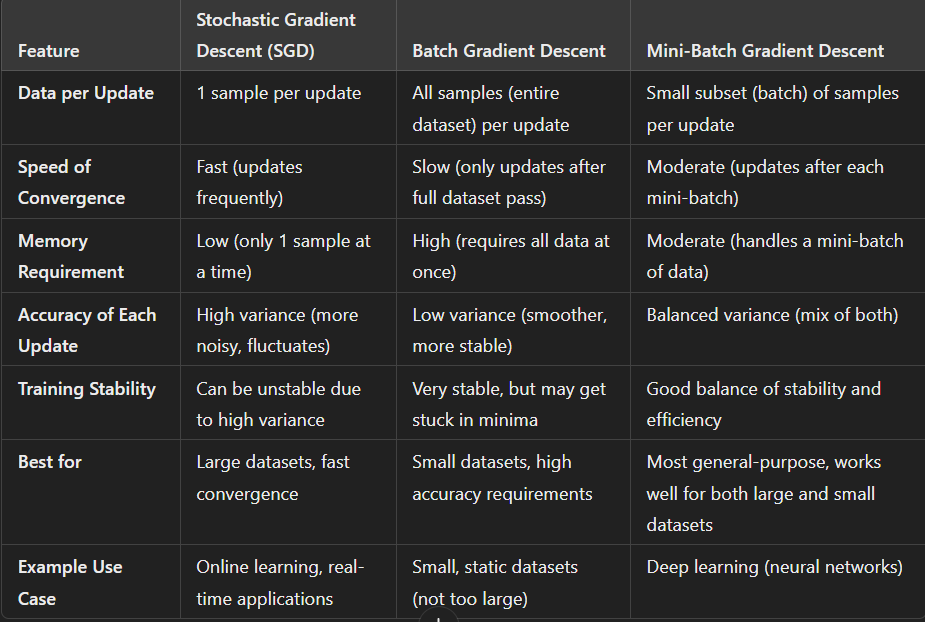

# **Implementation of stochastic and batch grandient descent in python**

We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

# **(1) Batch Gradient Descent Implementation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
16,1180,3,48.0
5,1170,2,38.0
17,1540,3,60.0
7,3300,4,155.0


**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X,scaled_y

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

**We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D**

In [6]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

**Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction**

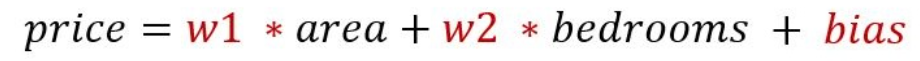

**Now is the time to implement mini batch gradient descent.**

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,

w1 = 0.66469087 w2 = 0.60541671 bias = -0.17792104056392882

**Now plot epoch vs cost graph to see how cost reduces as number of epoch increases**

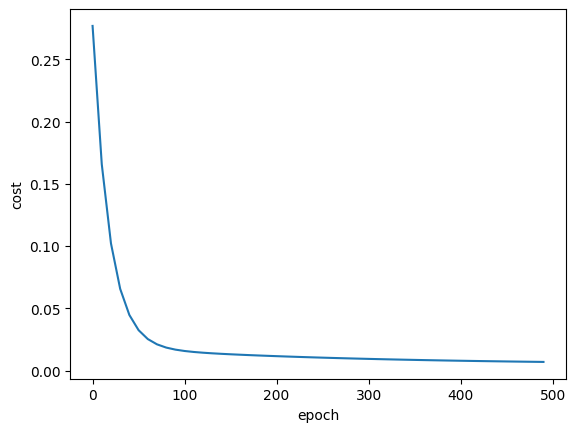

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

**Lets do some predictions now.**

In [9]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [10]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [11]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

# **(2) Stochastic Gradient Descent Implementation**

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [14]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

4

In [16]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70330297, 0.67128211]), -0.22558027253407562, 0.001675563459454799)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [17]:
w , b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

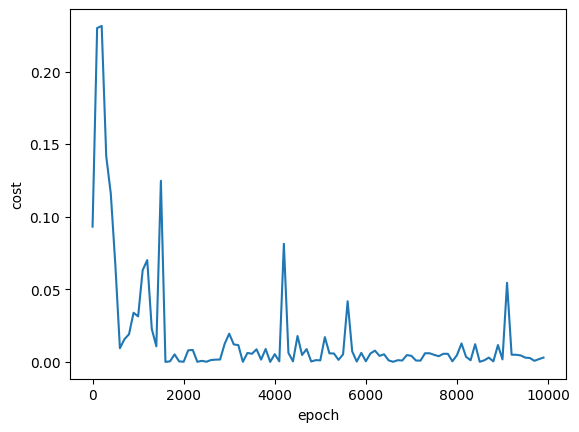

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [19]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.44591494248056

In [20]:
predict(1000,2,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.75042745055867

In [21]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.77618144486857

# **(3) Mini-Batch Gradient Descent Implementation**

In [22]:
np.random.permutation(20)

array([10,  2, 16,  6,  4, 13,  0,  8, 17,  7,  3,  5,  9, 19, 18, 15, 14,
        1, 12, 11])

In [23]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.70999158, 0.67811271]), -0.23333295617296174, 0.005865001197754213)

Check price equation above. In that equation we were trying to find values of w1,w2,w3 and bias. Here we got these values for each of them,

w1 = 0.50381807 w2 = 0.85506386 w3 = 0.34167275 bias = -0.3223

Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

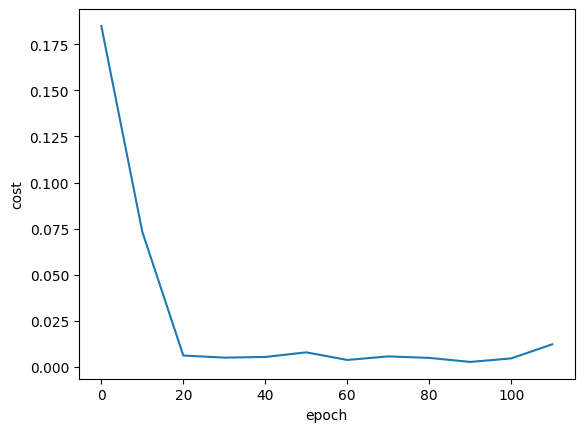

In [25]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

Lets do some predictions now.

In [26]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.6513608263349

In [27]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.99662139054061

In [28]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.4085914864344